# Введение в искусственные нейронные сети
# Урок 5. Рекуррентные нейронные сети

**Небольшое превью моим студентам:**

1. Английские термины в конспекте используются не случайно, а потому что технологии заимствованы в язык вместе с названиями и большинству людей привычнее использовать оригинальную терминологию. Vanishing gradients в русском - затухающие градиенты, "взрывающиеся градиенты" практически не говорят; то же относится к input-output. Таков мир вокруг нас. ¯\_(ツ)_/¯
2. Т.к. на уроке было не очевидно, как LSTM спасается от vanishing gradients, этому уделено много внимания.
3. Успехов и задора в учёбе, Милене привет :)

## Содержание методического пособия:


<ol>
<li>Что такое Рекурретные нейронные сети</li>
<li>Архитектура Рекуррентных нейронных сетей</li>
<li>Пример на Keras рекуррентной нейронной сети</li>
</ol>

## Что такое Рекуррентные нейронные сети





Нейронные сети которые мы разбирали ранее относяться к классу feed forward нейронных сетей или сетей прямого распространения. Выходной сигнал слоя в этих нейронных сетях передавался напрямую в следующий слой. Однако есть задачи, в которых нам нужно обучать нейронную сеть не на единичных экземплярах наподобие изображений, а на наборах последовательностей, например последовательностей слов. 

В рекуррентной нейронной сети выходной сигнал внутренних слоев циркулирует в этих слоях некоторое время. При обучении такой нейронной сети прежние выходные сигналы используются как дополнительные input'ы. Можно сказать, что эти дополнительные input'ы конкатенируются с "нормальными" input'ами предыдущего слоя.




**Интуиция, лежащая за устройством рекуррентного нейрона**

Рекуррентная сеть реализует идею памяти или, если угодно, контекста. При работе с последовательностью, например, предложением "Иван переехал в Париж и теперь завтракает ХХХ" контекст (а именно Париж) намекает на то, что можно ожидать в конце предложения - круассан, сыр или другие вещи, ассоциируемые с французской кухней, а варианты в духе холодца - менее ожидаемы. Последовательность может быть последовательностью букв (и складываться в слова, предложения или текст), последовательностью слов (и складываться в предложения или текст) и последовательностью предложений (и складываться в текст). То, как определяется один элемент последовательности, решается разработчиком модели. При этом при обучении сети на вход каждый раз подается по одному элементу последовательности, при этом, разумеется, строго сохраняется их порядок, т.к. предложение может потерять смысл или приобрести противоположный, если перемешать слова в нем.

В простом рекуррентном нейроне эта идея запоминания ранее поданных на вход сети элементов последовательности реализована с помощью дополнительного input'a. Так, в каждый момент нейрону подается один элемент последовательности x И внутреннее состояние этого нейрона на предыдущем шаге h. В начальный момент времени x имеем из заготовленных данных, а h инициализируем случайно. При этом нейрон работает с такими входами линейно, как и раньше:
$$output = \sigma(w_x \cdot x + w_h \cdot h)$$
В реальности вектора $x$ и $h$ конкатенируются в новый вектор $X$, тогда вместо двух векторов весов $w_x, \space w_h$ получим один, т.к. каждый вес будет умножаться только на одну координату (признак) вектора $X$ - это правило оператора скалярного произведения. Тогда запись редуцируется до $output = \sigma( w \cdot X)$, т.е. внутри реккурентного нейрона происходят всего 2 вычислительные операции - скалярное умножение и взятие сигмоиды.


Далее трюк: результат работы этого нейрона (т.е. его $output$) вновь передается ему на вход в виде вектора $h$. Вектор $x$ теперь - новый элемент последовательности.

Обратите внимание, что все это время мы говорим об одном и том же нейроне: $output$ подается на вход в тот же слой, в котором был посчитан. При этом в следующий слой сети, если такой есть, он подается тоже, т.к. иначе невозможен процесс оптимизации нейросети. Как и всегда, оптимизация здесь - это подбор весов в линейной операции.
Тогда одна эпоха обучения нейрона - подача ему всех объектов одной последовательности.

См. ниже развертку одного нейрона по времени. Индекс - номер элемента последовательности, который мы на данном шаге скармливаем в input рекуррентному нейрону. $А$ - сам нейрон, т.е. 2 операции, описанные выше. $h_t$ - output нейрона в момент времени t (на элементе последовательности номер t). Каждый раз с новым элементом последовательности $x_{t + 1}$ мы прокидываем в нейрон в векторе $h_t$ всю информацию, выученную нейроном на элементах последовательности от 0 до t.

1 рекуррентный нейрон во временной развертке:
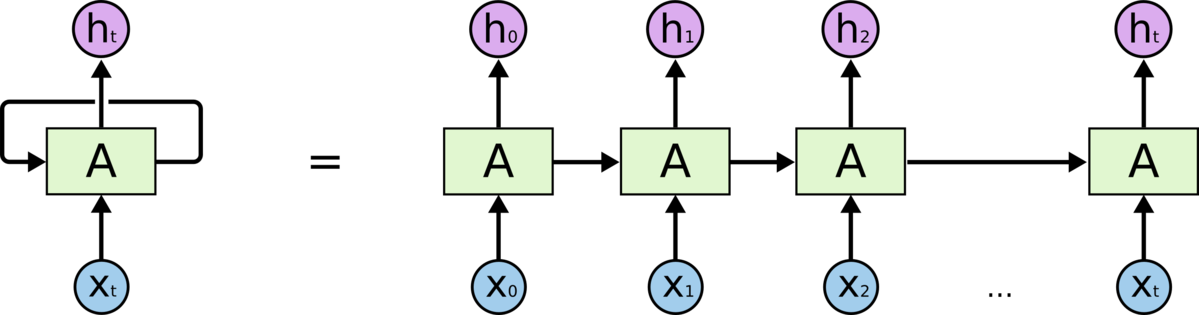

Реккурентные нейронные сети используются например для того, чтобы научить компьютерные системы "понимать" человеческий язык, для генерации текста. Также нейронные сети с подобной архитектурой могут использоваться для любых задач где осуществляется работа с некоторыми последовательностями значений, например с биржевыми котировками. Разновидности реккуретных нейронных используются также для постороения ИИ, подобных тем, что обыграли человека в компьютерную игру Dota 2. В отличие от сверточных нейронных сетей реккурентные нейронные сети как правило содержат небольшое количество слоев и например рекуррентая нейронная сеть в несколько десятков слоев будет считаться большой.

**Сверточные vs рекуррентные сети**

На прошлом уроке говорили о том, что свертки применяются для видео и временных рядов - что, очевидно, примеры последовательностей. В чем же разница в реккурентными сетями?

Сверточные сети не обладают памятью, связи между соседствующими объектами (последовательными кадрами видео или измерениями во временном ряду) они выучивают по их пространственной близости, т.к. сверткам нужно учиться сразу на всей последовательности, чтобы эти отношения обнаружить.

Рекуррентные сети "запоминают" каждый элемент последовательности, и учатся на них поочередно, а не сразу на всей последовательности.

## Архитектура Рекуррентных нейронных сетей


Несмотря на то, что RNN могут хорошо справляться со своими задачами они не могут работать с длинными последовательностями. Эффективно они могут работать только с последовательностями состоящими из 3-4 элементов. Для, к примеру, анализа текста отзывов на предмет того положительный это отзыв или нет этого будет недостаточно. Здесь может понадобиться анализ нескольких десятков слов, чтобы сделать корректный вывод. Давайте обсудим почему обычной RNN не удается анализировать длинные последовательности. 

#### Vanishing gradient problem

Из материалов по сверточным нейронным сетям нам известна проблема исчезающего градиента. В случае с большим количеством слоев значение градиента при последовательном обновлении большого количества слоев становится все меньше и может стать настолько маленьким, что не сможет в принципе существенно изменить поведение нейронов. В реккурентных нейронных сетях из-за сигнала циркулирующего внуртри слоев это проблема становиться еще острее. Причем градиент может стать не только очень маленьким, но и очень большим.



**Vanishing gradients**

Проблема естественно следует из применения сложной производной. Пока пример безотносительно RNN, пусть имеет обычную полносвязную глубокую сеть с количеством слоев $k$, функция активации везде сигмоида. Тогда вычисление градиента ошибки для матрицы весов $w_k$ на слое $k$ будет выглядеть так:
$$\frac{d(Error)}{dw_k} = \frac{d(Error)}{d(\sigma (w_k X_k))} \cdot \frac{d(\sigma (w_k X_k))}{dw_k}$$
$$\color{grey}{ = (Error - \sigma (w_k X_k)) \cdot \sigma (w_k X_k) \cdot (1 - \sigma (w_k X_k)) \cdot X_k}$$
При этом $X_k$ - это выход из слоя $k - 1$, т.е. функция $\sigma(w_{k-1} X_{k - 1})$. 
Теперь посчитаем производную от ошибки на предпоследнем слое (напомню, что backpropagation этим и занимается вплоть до самого первого слоя):
$$\frac{d(Error)}{dw_{k-1}} = \frac{d(Error)}{d(\sigma (w_k X_k))} \cdot \frac{d(\sigma (w_k X_k))}{dX_k} \cdot \frac{d X_k}{dw_{k - 1}} $$
$$\color{grey}{ = (Error - \sigma (w_k X_k)) \cdot \sigma (w_k X_k) \cdot (1 - \sigma (w_k X_k)) \cdot w_k \cdot \sigma (w_{k-1} X_{k-1}) \cdot (1 - \sigma (w_{k_1} X_{k-1})) \cdot X_{k - 2}}$$
Это просто расписанное правило производной сложной функции. Хочу, чтобы вы обратили внимание, что в слое $k - 1$ производная умножается на веса $w_k$. Аналогично, в $k - 2$ производная умножится на веса $w_{k - 1}$ и так по все глуине сетки, т.е. в итоге мы получим производную ошибки как функция вида $$error \space derivative = g(X) \cdot \prod_{i=1}^k w_i $$,
т.е. мы умножимся на все веса. И это проблема примерно всегда. Рассмотрим 2 противоположных случая:
1. Регуляризуем веса, сохраняем небольшими. Тогда градиенты быстро вырождаются в 0 после такой цепочки умножений на числа, меньшие 1.
2. Не регуляризуем веса, тогда с большими весами наоборот, градиенты взрываются - корректный термин 'exploding gradient' - т.е. становятся огромными. Тогда модель просто не сходится к минимуму - становится неустойчивой, может вычислительно вылететь при обновлении весов.
3. Все веса = 1 - процветание и успех, только сетка не учится :) *(это шуточный пример)*

Кроме весов в производную ошибки на каждом слое входят производные функций активации с последующих слоев, которые, будучи ограниченны от 0 до 1 для некоторых функций, также вносят свой вклад в уменьшение градиентов.

Этот феномен называется vanishing\exploding gradients и всегда возникает в глубоких сетках. В рекуррентных сетях он возникает даже при одном слое, т.к. один слой многократно прокидывает в себя свои прошлые состояния $h_t = \sigma (w_h h_{t - 1} + w_x x_{t})$, каждое из которых зависимо от весов $w_h: \space$  $h_{t - 1} = \sigma (w_h h_{t - 2} + w_x x_{t - 1})$, т.е. при дифференцировании появится множитель $(w_h)^t$, t индексируем от 0. И с этим нужно что-то решать.

### Long Short Term Memory(LSTM)

Решить проблему исчезающего градиента призвана разновидность RNN под названием LSTM.

Long short-term memory (LSTM) юниты - это блоки из которых состоят слои одной из разновидностей рекуррентной нейронной сети(RNN). RNN состоящая из LSTM юнитов иногда называется просто LSTM. Обычно LSTM юнит представляет из себя ячейку состоящую из input gate, output gate и forget gate. Эти ячейки отвественны за запоминания значений на определенные промежутки времени.

Каждый из этих элементов можно представить как типичный искусственный нейрон в многослойной неройнной сети, они вычисляют активацию(используя функцию активации) как взвешенную сумму. Их работа сводится к регуляции потока значений через блок LSTM, поэтому они и называются ворота или затворы(gate). Понятие долгой памяти в названии возникло из-за того что они могут запоминать информацию на более длинный период времени чем обычная RNN. LSTM хорошо подходит для классификации процессов и предсказания временных последовательностей неизвестного размера и неизвестных промежутков между важными событиями. С технической точки зрения это достигается за счет ликвидации проблем связанных с exploding и vanishing gradient'ами.

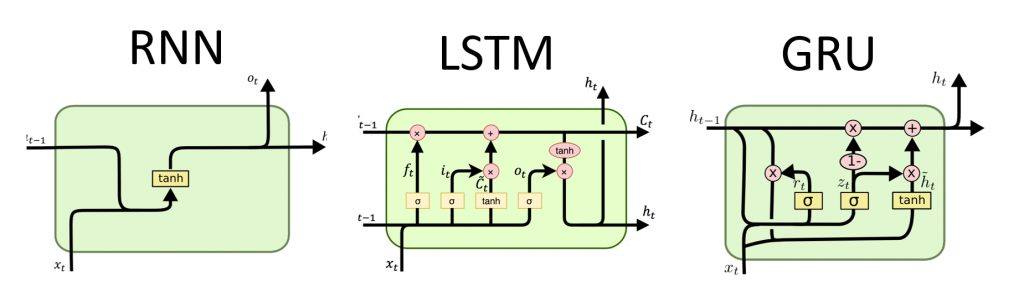

### Компоненты LSTM.  
Ниже спискок приведен список компонентов из которых состоит ячейка LSTM:


<ol>
<li>Forget Gate "f" (нейронная сеть с сигмоидой)</li>
<li>Candidate layer "С" (нейронная сеть c Tanh)</li>
<li>Input Gate "I" (нейронная сеть с сигмоидой)</li>
<li>Output Gate "O"(нейронная сеть с сигмоидой)</li>
<li>Скрытоое состояние "H" (вектор)</li>
<li>Состояние памяти "C" (вектор)</li>
<li>Входы в LSTM ячейку на любом шаге Xt (текущий input) , Ht-1 (предыдущее скрытое сотояние ) и Ct-1 (предыдущее состояние памяти)</li>
<li>Выходы LSTM ячейки это Ht (текущее скрытое состояние ) и Ct (текущее состояние памяти)</li>
</ol>







###### Работа затворов в LSTM


Во-первых LSTM ячейка берет предыдущее состояние памяти $C_{t-1}$ и умножает на значение в forget gate(f), чтобы определить, присутствует ли состояние памяти $C_t$. Если forget gate значение равно 0 то предыдущее состояние память полностью забывается, если же f forget gate значение равно 1 то предыдущее значение состояния памяти полностью проходит через ячейку(помните, что f gate дает значение между 0 и 1).

$$C_{t} = C_{t-1} \cdot f_{t}$$

Вычисляем новое состояние памяти:

$$C_{t} = C_{t} + (I_{t} \cdot C`_{t})$$

Теперь, вычисляем выходное значение:

$$H_{t} = tanh(C_{t})$$

**Как в реальности LSTM решает проблему vanishing gradients**

Во-первых, решает частично.
Во-вторых, с помощью концепции "долговременной памяти". $C_t$ - долговременная память, $h_t$ - краткосрочная. Обеспечивается это двумя фокусами:

1. Привычных нам функций активации для вектора $C_t$ в LSTM нет. Математически перед выходом на новый слой происходит вот что: $C_t = C_{t - 1} \cdot forget \space gate + C_{t \space new} \cdot input \space gate$. Forget gate, input gate - это внутренние параметры, можно считать, что веса, с которыми мы забываем старую информацию (forget gate) и усваиваем новую (input gate). Тогда функция активации на выходе получается такая: $f(z) = z$. Почему? Еще раз: мы не приводим никакого преобразования над сложенными с какими-то весами старым и новым векторами памяти. Производная функции $f'(x) = (x)' = 1$. Она же идеальна, т.к. не уменьшает и не увеличивает градиенты.
2. Теперь еще более насущный вопрос: веса.
В этой схеме несколько независимых весов (перед всеми желтыми функциями активации на рисунке: 3 сигмоиды и один гиперболический тангенс). Тогда $$\frac{d(Error)}{dw_t} = \frac{d(Error)}{dw_{1t}} + \frac{d(Error)}{dw_{2t}} + \frac{d(Error)}{dw_{3t}} + \frac{d(Error)}{dw_{4t}}$$
И это в целом уже звучит как половина решения - если в этой сумме хотя бы одна производная не будет уменьшаться экспоненциально с увеличением t, то и вся сумма не превратится в 0. За это отвечает forget gate, умножая input на число из промежутка [0,1]. Там, где forget gate выучится на 1, при backpropagation будет сохраняться компонента вектора $C_t$ со всех прошлых слоев; там, где на 0, компонента памяти будет полностью игнорироваться и забиваться из нового слоя; промежуточные значения будут каким-то компромиссом из новых данных и прошлого контекста. В терминах градиента (я не буду приводить полную производную для LSTM, она большая и страшная :) ) сначала напомню, что в RNN с экпоненциальным затуханием градиента мы столкнулись из-за зависимости $h_t = f(h_{t - 1})$. Здесь она остается, но добавляется аналогичная зависимость для вектора памяти $C_t = g(C_{t - 1})$, у которой, однако, есть отличное свойство. Частная производная
$$\frac{dC_t}{dC_{t - 1}} = forget \space gate= \sigma (w_h h_{t - 1} + w_x x_{t - 1})$$
В следующем слое:
$$\frac{dC_t}{dC_{t - 1}} \cdot \frac{dC_{t - 1}}{dC_{t - 2}} = \sigma' (w_h h_{t - 1} + w_x x_{t - 1}) \cdot \sigma' (w_h h_{t - 2} + w_x x_{t - 2})$$
То есть мы избавляемся от степенного члена $(w_h)^t$, который был в сложной производной RNN. При этом градиенты в LSTM все еще могут устремляться к 0, так как мы многократно перемножаем производные сигмоиды, но это происходит много-много медленнее, чем в случае простой RNN. И все за счет избавления от множителя весов.

Тут может возникнуть вопрос: а почему мы избавляемся от весов, если они могут оказаться большими и при перемножении на производные сигмоиды (они меньше 1, максимум производной сигмоиды = 0.25) наоборот помочь бороться с затуханием градиента? Ответ: потому что это сработает только в том случае, если действительно все веса будут >= 4, при этом так, чтобы покоординатно соответствовать обратным значениям сигмоиды (так, чтобы при перемножении получилось что-то около 1 по каждой координате). Не звучит как надежная схема. :) 

Ну и надо понимать, что все архитектуры нейросетей очень серьезно тестируются перед написанием статей, и, бывает, что не получается строго математически доказать, почему концепция сработала, но результаты перформанса такой архитектуры служат достаточным доказательством для использования и распространения новой практики. У человечества в целом есть проблемы с объяснением математики и трактовкой работы нейросеток :)

Кстати, как видно из рассуждений выше, проблема exploding gradients в LSTM вполне может возникнуть. 

Аналогичная идея лежит в основе GRU: разделение ошибки сети на сумму ошибок нескольких независимых членов + update gate.

### GRU

Теперь, когда мы знаем как работает LSTM, давайте бегло взглянем на то, как работате GRU. GRU это более новое поколение рекуррентных нейронных сетейи и оно во многом похоже на LSTM. Но есть определенная разница. В GRU не используется состояние яченийки и используется скрытое состояние для передачи информации. В GRU также есть два затвора - reset gate и update gate.

Update Gate обновляет затворы действуя подобно forget и input gate, которые используются в LSTM. Он решает какая информация будет отброшена, а какая новая информация будет добавлена. Reset Gate это другой затвор использующийся для принятия решения как много прошлой информации будет забыто. В этих особенностях и заключается архитектура GRU. GRU имеет меньше тензорных операций и соответсвенно тренеруется быстре чем LSTM. Однако нельзя сказать точно какая архитектура лучше. Исследователи и инженеры пытаются определить, что в каждом конкретном случае подойдет больше. Если говорить упрощенно то GRU может подойти тогда когда важнее скорость чем точность, а LSTM тогда когда важнее точность чем скорость. 

**Embedding**

Перед тем, как начать работать с текстом методами машинного обучения, его бы неплохо перевести с человеческого языка в математическое отображение в пространстве (например, $R^n$ или $[0, 1]^n$). Это представление называется embedding.

**Немного истории**
word2vec - библиотека для векторного представления слов. Сохраняет отношения между объектами, пример:  king - man + woman = queen. Тоже эмбеддинг, основанной на частоте использования слов друг с другом, т.е. строящийся из контекста.

Какие-то примеры эмбеддингов (самые простейшие и не исчерпывающие тему):
  - one-hot encoding
  просто сопоставить число каждому уникальному слову во всех имеющихся текстах. предложение кодировать векторами из 0 и 1, где 0 в i-ой позиции говорит о том, что слово под номером i не встречается в объекте (предложении, словосочетании или любом отрывке текста), а 1 - встречается.
  - bag-of-words
Подход, в котором словарь составляется с учетом частоты встречаемости слова. Ключ - слово, значение - сколько раз слово встретилось в объекте. Примеры на вики: https://en.wikipedia.org/wiki/Bag-of-words_model
  - n-gramms 
Подход, в котором за единицу языка берется не слово, а n слов, подряд встречающихся в предложении.
  Having been frightened by noise, the dog ran out.
  8 слов; 7 словосочетаний из 2 слов; 6 словосочетаний по 3.
  би-граммы: Having been, been frightened, frightened by и т.д.

  - tf-idf
  f1 = частота слова в объекте. f2 =  частота слова во всем корпусе объектов.
  f1 / f2 - получаем относительную специфичность слова. У частых и бессмысленных слов типа 'and', 'the' значение будет очень мало, у редких и важных контекстуально, типа 'topology', 'Gauss' - большое. Это упрощенный взгляд, tf-idf идет дальше и рассчитывает долю объектов, содержащих слово. 
tf = f1, idf = $log(\frac{k}{N})$, N - общее число объектов в выборке, k - число объектов, содержащий слово. Тогда создается словарь из слов, где ключи - сами слова, а значения - tf $\cdot $ idf

А вообще разных эмбэддингов огромное количество, теоретически это может быть совершенно любая функция, отображающее слово в числовое пространство.

## Практика

Давайте попробуем сделать простую реккурентную нейронную сеть, которая будет учиться складывать числа. Для этих целей мы не будем пользоваться фреймворками для Deep Learning, чтобы посмотреть как она работает внутри.


In [1]:
# впервую очередь подключим numpy и библиотеку copy, которая понадобиться, чтобы сделать deepcopy ряда элементов

import copy, numpy as np
np.random.seed(0)

# вычислим сигмоиду
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# конвертируем значение функции сигмоиды в ее производную. 
def sigmoid_output_to_derivative(output):
    return output*(1-output)

# генерация тренировочного датасета
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(
    np.array([list(range(largest_number))],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = binary[i]

# входные переменные
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1


# инициализация весов нейронной сети
synapse_0 = 2*np.random.random((input_dim,hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim,output_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim,hidden_dim)) - 1

synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

# тренировочная логика
for j in range(10000):
    
    # генерация простой проблемы сложения (a + b = c)
    a_int = np.random.randint(largest_number/2) # int version
    a = int2binary[a_int] # бинарное кодирование

    b_int = np.random.randint(largest_number/2) # int version
    b = int2binary[b_int] # бинарное кодирование

    # правильный ответ
    c_int = a_int + b_int
    c = int2binary[c_int]
    
    # место где мы располагаем наши лучше результаты (бинарно закодированные)
    d = np.zeros_like(c)

    overallError = 0
    
    layer_2_deltas = list()
    layer_1_values = list()
    layer_1_values.append(np.zeros(hidden_dim))
    
    # движение вдоль позиций бинарной кодировки
    for position in range(binary_dim):
        
        # генерация input и output
        X = np.array([[a[binary_dim - position - 1],b[binary_dim - position - 1]]])
        y = np.array([[c[binary_dim - position - 1]]]).T

        # внутренний слой (input ~+ предыдущий внутренний)
        layer_1 = sigmoid(np.dot(X,synapse_0) + np.dot(layer_1_values[-1],synapse_h))

        # output layer (новое бинарное представление)
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # проверка упустили ли мы что-то и если да, то как много 
        layer_2_error = y - layer_2
        layer_2_deltas.append((layer_2_error)*sigmoid_output_to_derivative(layer_2))
        overallError += np.abs(layer_2_error[0])
    
        # декодируем оценку чтобы мы могли ее вывести на экран
        d[binary_dim - position - 1] = np.round(layer_2[0][0])
        
        # сохраняем внутренний слой, чтобы мы могли его использовать в след. timestep
        layer_1_values.append(copy.deepcopy(layer_1))
    
    future_layer_1_delta = np.zeros(hidden_dim)
    
    for position in range(binary_dim):
        
        X = np.array([[a[position],b[position]]])
        layer_1 = layer_1_values[-position-1]
        prev_layer_1 = layer_1_values[-position-2]
        
        # величина ошибки в output layer
        layer_2_delta = layer_2_deltas[-position-1]
        # величина ошибки в hidden layer
        layer_1_delta = (future_layer_1_delta.dot(synapse_h.T) + layer_2_delta.dot(synapse_1.T)) * sigmoid_output_to_derivative(layer_1)

        # обновление всех весов и пробуем заново
        synapse_1_update += np.atleast_2d(layer_1).T.dot(layer_2_delta)
        synapse_h_update += np.atleast_2d(prev_layer_1).T.dot(layer_1_delta)
        synapse_0_update += X.T.dot(layer_1_delta)
        
        future_layer_1_delta = layer_1_delta
    

    synapse_0 += synapse_0_update * alpha
    synapse_1 += synapse_1_update * alpha
    synapse_h += synapse_h_update * alpha    

    synapse_0_update *= 0
    synapse_1_update *= 0
    synapse_h_update *= 0
    
    # вывод на экран процесса обучения
    if(j % 1000 == 0):
        print("Error:" + str(overallError))
        print("Pred:" + str(d))
        print("True:" + str(c))
        out = 0
        for index,x in enumerate(reversed(d)):
            out += x*pow(2,index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out))
        print("------------")


Error:[3.45638663]
Pred:[0 0 0 0 0 0 0 1]
True:[0 1 0 0 0 1 0 1]
9 + 60 = 1
------------
Error:[3.63389116]
Pred:[1 1 1 1 1 1 1 1]
True:[0 0 1 1 1 1 1 1]
28 + 35 = 255
------------
Error:[3.91366595]
Pred:[0 1 0 0 1 0 0 0]
True:[1 0 1 0 0 0 0 0]
116 + 44 = 72
------------
Error:[3.72191702]
Pred:[1 1 0 1 1 1 1 1]
True:[0 1 0 0 1 1 0 1]
4 + 73 = 223
------------
Error:[3.5852713]
Pred:[0 0 0 0 1 0 0 0]
True:[0 1 0 1 0 0 1 0]
71 + 11 = 8
------------
Error:[2.53352328]
Pred:[1 0 1 0 0 0 1 0]
True:[1 1 0 0 0 0 1 0]
81 + 113 = 162
------------
Error:[0.57691441]
Pred:[0 1 0 1 0 0 0 1]
True:[0 1 0 1 0 0 0 1]
81 + 0 = 81
------------
Error:[1.42589952]
Pred:[1 0 0 0 0 0 0 1]
True:[1 0 0 0 0 0 0 1]
4 + 125 = 129
------------
Error:[0.47477457]
Pred:[0 0 1 1 1 0 0 0]
True:[0 0 1 1 1 0 0 0]
39 + 17 = 56
------------
Error:[0.21595037]
Pred:[0 0 0 0 1 1 1 0]
True:[0 0 0 0 1 1 1 0]
11 + 3 = 14
------------


Теперь давайте попробуем с помощью Keras построить LSTM нейронную сеть для оценки настроений отзвывов на IMD.

Данный датасет слишком мал, чтобы преимущества LSTM проявились, однако в учебных целях он подойдет.

В тренировке рекуррентных нейронных сетей важную роль играет размер batch, но еще большую роль играет выбор функций loss и optimizer.

In [6]:
LSTM?

## ДЗ

In [5]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 50 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Построение модели...


2022-07-31 21:05:15.403061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 21:05:15.403569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-31 21:05:15.403676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-31 21:05:15.403758: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-31 21:05:15.403836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Процесс обучения...
500/500 [==============================] - 14s 28ms/step - loss: 0.3740 - accuracy: 0.8350
Результат при тестировании: 0.373987078666687
Тестовая точность: 0.8349599838256836


In [7]:
from keras.utils import set_random_seed


In [8]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Построение модели...
Процесс обучения...
196/196 [==============================] - 11s 57ms/step - loss: 0.3653 - accuracy: 0.8430
Результат при тестировании: 0.36530250310897827
Тестовая точность: 0.8430399894714355


In [9]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 256 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Построение модели...
Процесс обучения...
98/98 [==============================] - 9s 96ms/step - loss: 0.3700 - accuracy: 0.8373
Результат при тестировании: 0.36995673179626465
Тестовая точность: 0.8372799754142761


In [10]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 100
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Построение модели...
Процесс обучения...
196/196 [==============================] - 13s 66ms/step - loss: 0.3371 - accuracy: 0.8540
Результат при тестировании: 0.33705779910087585
Тестовая точность: 0.8540400266647339


In [11]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 50
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 50)
x_test shape: (25000, 50)
Построение модели...
Процесс обучения...
196/196 [==============================] - 7s 34ms/step - loss: 0.3975 - accuracy: 0.8188
Результат при тестировании: 0.3974754214286804
Тестовая точность: 0.8187599778175354


In [13]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 25000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Построение модели...
Процесс обучения...
196/196 [==============================] - 12s 61ms/step - loss: 0.3587 - accuracy: 0.8437
Результат при тестировании: 0.35871386528015137
Тестовая точность: 0.843720018863678


In [14]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 15000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Построение модели...
Процесс обучения...
196/196 [==============================] - 12s 61ms/step - loss: 0.3727 - accuracy: 0.8410
Результат при тестировании: 0.3726717531681061
Тестовая точность: 0.8410000205039978


In [16]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 256))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Построение модели...
Процесс обучения...
196/196 [==============================] - 38s 194ms/step - loss: 0.3599 - accuracy: 0.8435
Результат при тестировании: 0.3599267601966858
Тестовая точность: 0.8434799909591675


In [18]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 150
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 256))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Построение модели...
Процесс обучения...
196/196 [==============================] - 78s 400ms/step - loss: 0.3538 - accuracy: 0.8514
Результат при тестировании: 0.35379499197006226
Тестовая точность: 0.8514400124549866


In [19]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 150
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 256))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Построение модели...
Процесс обучения...
196/196 [==============================] - 115s 590ms/step - loss: 0.3273 - accuracy: 0.8610
Результат при тестировании: 0.32725679874420166
Тестовая точность: 0.8610000014305115


In [20]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 150
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 256))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Построение модели...
Процесс обучения...
196/196 [==============================] - 91s 462ms/step - loss: 0.3418 - accuracy: 0.8587
Результат при тестировании: 0.3418366014957428
Тестовая точность: 0.858680009841919


In [25]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

set_random_seed(12)

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 150
batch_size = 128 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 256))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)


Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Построение модели...
Процесс обучения...
Epoch 1/10
196/196 [==============================] - 557s 3s/step - loss: 0.4801 - accuracy: 0.7733 - val_loss: 0.3863 - val_accuracy: 0.8344
Epoch 2/10
196/196 [==============================] - 516s 3s/step - loss: 0.3344 - accuracy: 0.8676 - val_loss: 0.4079 - val_accuracy: 0.8222
Epoch 3/10
196/196 [==============================] - 506s 3s/step - loss: 0.2534 - accuracy: 0.9053 - val_loss: 0.3774 - val_accuracy: 0.8394
Epoch 4/10
196/196 [==============================] - 487s 2s/step - loss: 0.1803 - accuracy: 0.9354 - val_loss: 0.4039 - val_accuracy: 0.8455
Epoch 5/10
196/196 [==============================] - 486s 2s/step - loss: 0.1230 - accuracy: 0.9577 - val_loss: 0.4671 - val_accuracy: 0.8458
Epoch 6/10
196/196 [=======================

Давайте также посмотрим пример в которм будет использоваться другой класс задач - генерация текста на основе тренировочного текста. В задачу нейросети будет входить обучившись на тексте Алиса в стране чудес и начать генерировать текст похожий на тот, что можно встретить в этой книге. Также в этом примере будет использоваться GRU.

In [27]:
%time
import numpy as np
from keras.layers import Dense, Activation, SimpleRNN, LSTM, GRU
from keras.models import Sequential


# построчное чтение из примера с текстом 
with open("alice_in_wonderland.txt", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)


# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 20, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1


# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 256, 256
NUM_ITERATIONS = 30 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 5
NUM_PREDS_PER_EPOCH = 100


# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. За ним последует полносвязный слой связанный с набором возможных следующих символов, которые конвертированы в вероятностные результаты через стандартную softmax активацию с multi-class cross-encoding loss функцию ссылающуются на предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        dropout=0.2,
        recurrent_dropout=0.2,
        return_sequences=True,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        int(HIDDEN_SIZE/2),
        dropout=0.2,
        recurrent_dropout=0.2,
        return_sequences=True,
        unroll=True
    )
)
model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        int(HIDDEN_SIZE/4),
        dropout=0.1,
        recurrent_dropout=0.1,
        return_sequences=False,
        unroll=True
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")


# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
print()


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


/tmp/ipykernel_3071/3479322561.py:38: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
/tmp/ipykernel_3071/3479322561.py:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)


Итерация #: 0
Epoch 1/5
621/621 [==============================] - 162s 220ms/step - loss: 2.5975
Epoch 2/5
621/621 [==============================] - 129s 208ms/step - loss: 2.1085
Epoch 3/5
621/621 [==============================] - 130s 210ms/step - loss: 1.9396
Epoch 4/5
621/621 [==============================] - 129s 208ms/step - loss: 1.8323
Epoch 5/5
621/621 [==============================] - 130s 209ms/step - loss: 1.7598
Генерация из посева: ctual property infri
ctual property infrish the could the could the could the could the could the could the could the could the could the cou==================================================
Итерация #: 1
Epoch 1/5
621/621 [==============================] - 130s 209ms/step - loss: 1.7042
Epoch 2/5
621/621 [==============================] - 130s 209ms/step - loss: 1.6609
Epoch 3/5
621/621 [==============================] - 126s 202ms/step - loss: 1.6334
Epoch 4/5
621/621 [==============================] - 125s 201ms/step - loss: 1.5983
Epo

621/621 [==============================] - 125s 201ms/step - loss: 1.2761
Генерация из посева: , looking round the 
, looking round the cook to the cook to the cook to the cook to the cook to the cook to the cook to the cook to the cook==================================================
Итерация #: 13
Epoch 1/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2749
Epoch 2/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2721
Epoch 3/5
621/621 [==============================] - 124s 200ms/step - loss: 1.2740
Epoch 4/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2709
Epoch 5/5
621/621 [==============================] - 124s 200ms/step - loss: 1.2680
Генерация из посева: et with the queen, a
et with the queen, and the mock turtle said to the caterpillar. i wonder the dormouse was a little golden speak out of t==================================================
Итерация #: 14
Epoch 1/5
621/621 [==============================]

621/621 [==============================] - 125s 201ms/step - loss: 1.2139
Epoch 3/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2125
Epoch 4/5
621/621 [==============================] - 124s 200ms/step - loss: 1.2131
Epoch 5/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2112
Генерация из посева: e, that he met in th
e, that he met in the soldiers went on, and the dormouse said to herself, and she said to herself to herself, and she sa==================================================
Итерация #: 26
Epoch 1/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2116
Epoch 2/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2077
Epoch 3/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2093
Epoch 4/5
621/621 [==============================] - 124s 200ms/step - loss: 1.2076
Epoch 5/5
621/621 [==============================] - 125s 201ms/step - loss: 1.2086
Генерация из посева: in th

## Анализ


В общем увеличение размера батча снижает точность, но при этом ускоряет обучение, решил остановиться на 128.
У максимальной длины прямая зависимость - чем больше максимальная длина тем выше точность.
max_features изменять большого смысла не увидел - если поставить 15000 то точеость упадет, а больше ставить там особо нет текстов длиннее.
Путем добавления  двух LSTM слоев и увеличением максимальной длины до 150 получилось  точность догнать до 86%. при добавлении четвертого слоя начинала падать точность (возможно из-за слишком малого голичества юнитов в последнем слое).
при попытке обучить на 10 эпох вместо одной получил падение метрики почти на 3%. Игра с оптимизаторами ощутимого эффекта не дает +- одинаково отрабатывает (с таким заморачиваться есть смысл наверно только на чемпионатах, где десятитысячная доля процента может тебя опрокинуть)


Со второй сетью все сложнее, она легко залиавет на одном-двух словах. Более-менее вменяемый результат получил при обучении трех слоях GRU.
. whats in it? said the king. the mock turtle said to the court, and she said to herself, and the dormouse said to the c

Но выглядит странно: все только и говорят, хотя может просто текст специфичный))
Еще есть гипотеза, что результат может быть лучше при разбивке на слова, а не посимвольно (тогда может хоть будет залипать целыми предложениями, а не словами))))


In [ ]:
%time
import numpy as np
from keras.layers import Dense, Activation, SimpleRNN, LSTM, GRU
from keras.models import Sequential


# построчное чтение из примера с текстом 
with open("alice_in_wonderland.txt", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)


# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 20, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1


# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 512, 512
NUM_ITERATIONS = 25 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 2
NUM_PREDS_PER_EPOCH = 300


# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. За ним последует полносвязный слой связанный с набором возможных следующих символов, которые конвертированы в вероятностные результаты через стандартную softmax активацию с multi-class cross-encoding loss функцию ссылающуются на предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    LSTM(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        dropout=0.2,
        recurrent_dropout=0.2,
        return_sequences=True,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(
    LSTM(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        int(HIDDEN_SIZE/2),
        dropout=0.2,
        recurrent_dropout=0.2,
        return_sequences=True,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(
    LSTM(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        int(HIDDEN_SIZE/4),
        dropout=0.1,
        recurrent_dropout=0.1,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")


# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
print()


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs


/tmp/ipykernel_3071/1054635543.py:38: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
/tmp/ipykernel_3071/1054635543.py:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)


Итерация #: 0
Epoch 1/2
311/311 [==============================] - 465s 1s/step - loss: 2.8476
Epoch 2/2
175/311 [===============>..............] - ETA: 3:02 - loss: 2.4439

In [22]:
keras.layers?

Object `keras.layers` not found.


In [ ]:
Генерация из посева: for days a
for days and the madd the madd the madd the madd the madd the madd the madd the madd the madd the madd the mad

## Практическое задание

<ol>
    <li>Попробуйте изменить параметры нейронной сети работающей с датасетом imdb либо нейронной сети работающей airline-passengers(она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить ее точность. Приложите анализ.</li>
    <li>Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.</li>
    <li>* Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM</li>
    <li>* Предложите свои варианты решения проблемы исчезающего градиента в RNN</li>
</ol>

## Дополнительные материалы

<ol>
    <li>Оригинальная научная статья по LSTM - https://www.bioinf.jku.at/publications/older/2604.pdf</li>
    <li>Оригинальная научная статья по GRU - https://arxiv.org/abs/1406.1078</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко, Кадурин, Архангельская: Глубокое обучение. Погружение в мир нейронных сетей 2018</li>
    <li>Aurélien Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2019</li>
    <li>https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</li>
    <li>https://github.com/llSourcell/recurrent_neural_net_demo</li>
    
</ol>